# 🧠 Introducción

El uso de datos personales para entrenar redes neuronales plantea desafíos críticos en materia de **privacidad y protección de la información**. Aunque tradicionalmente se han eliminado identificadores directos como nombres o correos electrónicos, este tipo de anonimización superficial ha demostrado ser insuficiente. Un caso emblemático es el del **Netflix Prize (2006)**, donde se liberaron más de 100 millones de calificaciones para estimular la investigación académica. A pesar de remover identificadores, investigadores lograron **reidentificar a usuarios** cruzando los patrones de calificación con datos públicos de IMDb, evidenciando que atributos como edad, género o código postal pueden ser suficientes para inferir identidades.

Este incidente marcó un punto de inflexión y evidenció la necesidad de técnicas más sólidas para proteger datos personales durante el entrenamiento de modelos. En la actualidad, los enfoques se centran en:

- 🔐 **Anonimización formal**: Transformación directa de datos reales mediante supresión, generalización o perturbación.
- 🛡️ **Privacidad diferencial**: Agregado de ruido controlado para limitar la contribución individual dentro del dataset.
- 🧬 **Generación de datos sintéticos**: Creación de registros nuevos que preservan la estructura estadística del dataset original, evitando el uso de información real de personas.

Estos métodos, conocidos como estrategias de *privacy-preserving machine learning*, buscan equilibrar dos objetivos fundamentales:  
**proteger la privacidad del individuo** y **mantener la utilidad del modelo**.

Además, existen diferencias importantes entre la anonimización y los datos sintéticos:

- 🔎 La **anonimización** modifica registros existentes (supresión, agrupación de edades, ruido, codificación).  
- 🧪 Los **datos sintéticos** generan muestras nuevas a partir de modelos probabilísticos o generativos (GANs, VAEs, diffusion models), reduciendo el riesgo de reidentificación siempre que no exista sobreajuste o memorias del modelo.

---

# 📘 Alcance del Trabajo

Este proyecto tiene como propósito comprender y aplicar técnicas de anonimización y generación de datos sintéticos dentro del entrenamiento de redes neuronales, evaluando su impacto tanto en la privacidad como en el rendimiento predictivo.

A continuación se detalla el proceso que se llevará a cabo:

---

## 1. 📂 Selección del Dataset  
- Elección de un dataset público que contenga atributos sensibles o identificables.  
- Identificación de campos que presenten riesgos de reidentificación.

---

## 2. 📊 Análisis Exploratorio  
- Visualización de distribuciones (histogramas, correlaciones, conteos).  
- Evaluación de posibles combinaciones que puedan revelar identidades.

---

## 3. 🧹 Técnicas de Anonimización  
Aplicación de al menos tres métodos:

- ❌ **Supresión** de columnas sensibles.  
- 📏 **Generalización** (agrupación de rangos, intervalos).  
- 🔀 **Perturbación** mediante ruido controlado.  
- 🔐 **Codificación** (hashing, one-hot encoding).  

Cada transformación será documentada y justificada según su impacto en la privacidad.

---

## 4. 🤖 Entrenamiento del Modelo  
Entrenamiento de una red neuronal sencilla bajo tres escenarios:

- Dataset **original**.  
- Dataset **anonimizado**.

Se evaluará mediante:

- Accuracy  
- Precision  
- Recall  
- F1-score  

---

## 5. 🧬 Generación de Datos Sintéticos  
- Uso de un método de síntesis (CTGAN, TVAE, GAN, VAE, etc.).  
- Entrenamiento del mismo modelo con los datos sintéticos.  
- Comparación del rendimiento frente a los datasets original y anonimizado.  
- Análisis del equilibrio entre **privacidad** y **utilidad**.

---

## 6. 📈 Análisis Final y Conclusiones  
Se responderá a:

- ¿Qué técnica ofrece mayor protección de la privacidad?  
- ¿Qué impacto tiene cada enfoque en el rendimiento del modelo?  
- ¿Cuál sería más adecuada para sectores sensibles como salud, educación o finanzas?

---

# 📍 Conclusión General de la Introducción

Este trabajo permitirá comprender cómo diferentes técnicas de anonimización y generación sintética modifican la estructura de los datos, influencian la privacidad de los individuos y afectan el desempeño de redes neuronales. A través de este análisis comparativo se busca desarrollar criterios sólidos para seleccionar la estrategia adecuada en contextos reales donde la protección de datos personales es prioritaria.

## 1. Importar librerías y cargar el dataset

In [463]:
import pandas as pd
import numpy as np

# Cargar archivo
df = pd.read_csv('/Users/usr-s3c/Documents/Maestria_YTech/Redes-Neuronales/df/df_finanzas.csv', sep=';')

# Mostrar forma y primeras filas
print("Shape:", df.shape)
df.head()

Shape: (99997, 38)


/var/folders/8j/llgk77912n1_x415m3ds8q7h0000gn/T/ipykernel_21492/976344272.py:5: DtypeWarning: Columns (12,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/usr-s3c/Documents/Maestria_YTech/Redes-Neuronales/df/df_finanzas.csv', sep=';')


,ID,EJERCICIO_FISCAL,SECTOR,SECTOR_DESC,ENTIDAD,ENTIDAD_DESC,UNIDAD_EJECUTORA,UNIDAD_EJECUTORA_DESC,PARTIDAD_INDIVIDUAL,ENLACE_GRUPO,...,NOMBRE_ESTADO_SERVIDOR,NOMBRE_UNIDAD_ORGANIZACIONAL,ESTRUCTURA_ORGANICA,RUC_PATRONAL,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1449,DIRECCION DISTRITAL 17D07 - PARROQUIAS URBANAS...,9,51.0,...,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,76804E+12",NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1301,DIRECCION DISTRITAL 12D01 - BABA-BABAHOYO-MONT...,154,51.0,...,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,26001E+12",NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1118,DIRECCION DISTRITAL 06D05 - GUANO-PENIPE - SALUD,302,51.0,...,ACTIVO,VIGILANCIA EPIDEMIOLOGICA,PROCESO AGREGADOR DE VALOR,"6,60806E+11",NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6707,DIRECCION DISTRITAL 01D02 PARROQUIA URBANA SAN...,599,51.0,...,ACTIVO,DOCENTES EDUCACION GENERAL BASICA,PROCESO AGREGADOR DE VALOR,"1,6006E+11",NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,9005,DIRECCION DISTRITAL 17D09 PARROQUIAS RURALES T...,561,51.0,...,ACTIVO,RICARDO RODRIGUEZ,PROCESO AGREGADOR DE VALOR,"1,76817E+12",NaN,NaN,NaN,NaN,NaN,NaN


## 2. Información general del dataset

In [464]:
# Tipos de datos y no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              99997 non-null  int64  
 1   EJERCICIO_FISCAL                99997 non-null  int64  
 2   SECTOR                          99997 non-null  int64  
 3   SECTOR_DESC                     99997 non-null  object 
 4   ENTIDAD                         99997 non-null  int64  
 5   ENTIDAD_DESC                    99997 non-null  object 
 6   UNIDAD_EJECUTORA                99997 non-null  int64  
 7   UNIDAD_EJECUTORA_DESC           99997 non-null  object 
 8   PARTIDAD_INDIVIDUAL             99997 non-null  int64  
 9   ENLACE_GRUPO                    99884 non-null  float64
 10  NOMBRE_PROVINCIA                99997 non-null  object 
 11  NOMBRE_CANTON                   99997 non-null  object 
 12  NUMERO_DOCUMENTO                

In [465]:
df.isna().sum()

ID                                    0
EJERCICIO_FISCAL                      0
SECTOR                                0
SECTOR_DESC                           0
ENTIDAD                               0
ENTIDAD_DESC                          0
UNIDAD_EJECUTORA                      0
UNIDAD_EJECUTORA_DESC                 0
PARTIDAD_INDIVIDUAL                   0
ENLACE_GRUPO                        113
NOMBRE_PROVINCIA                      0
NOMBRE_CANTON                         0
NUMERO_DOCUMENTO                      0
APELLIDOS_NOMBRES                     0
FECHA_NACIMIENTO                      0
GENERO                               26
FECHA_INICIO                          0
FECHA_FIN                             0
NOMBRE_REGIMEN_LABORAL                0
NOMBRE_NIVEL_OCUPACIONAL              0
NOMBRE_MODALIDAD_LABORAL              0
DESCRIPCION_ESCALA_OCUPACIONAL        0
NOMBRE_DENOMINACION_PUESTO            0
RMU_PUESTO                            0
ACUMULA_DEC_TERCERO                   0


In [466]:
df.describe()

,ID,EJERCICIO_FISCAL,SECTOR,ENTIDAD,UNIDAD_EJECUTORA,PARTIDAD_INDIVIDUAL,ENLACE_GRUPO
count,99997.000000,99997.0,99997.000000,99997.000000,99997.000000,9.999700e+04,99884.000000
mean,49999.000000,2016.0,111.070292,237.114683,4718.506535,4.987084e+04,51.729827
std,28866.791771,0.0,2.016683,119.576850,3323.410110,1.357037e+06,2.346891
min,1.000000,2016.0,111.000000,1.000000,0.000000,0.000000e+00,51.000000
25%,25000.000000,2016.0,111.000000,140.000000,1253.000000,1.150000e+02,51.000000
50%,49999.000000,2016.0,111.000000,140.000000,6645.000000,3.520000e+02,51.000000
75%,74998.000000,2016.0,111.000000,320.000000,7001.000000,9.900000e+02,51.000000
max,99997.000000,2016.0,211.000000,974.000000,9999.000000,6.000186e+07,99.000000


In [467]:
# Eliminar filas con valores NaN
df.shape


(99997, 38)

In [468]:
df

,ID,EJERCICIO_FISCAL,SECTOR,SECTOR_DESC,ENTIDAD,ENTIDAD_DESC,UNIDAD_EJECUTORA,UNIDAD_EJECUTORA_DESC,PARTIDAD_INDIVIDUAL,ENLACE_GRUPO,...,NOMBRE_ESTADO_SERVIDOR,NOMBRE_UNIDAD_ORGANIZACIONAL,ESTRUCTURA_ORGANICA,RUC_PATRONAL,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1449,DIRECCION DISTRITAL 17D07 - PARROQUIAS URBANAS...,9,51.0,...,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,76804E+12",NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1301,DIRECCION DISTRITAL 12D01 - BABA-BABAHOYO-MONT...,154,51.0,...,ACTIVO,ATENCION INTEGRAL EN SALUD,PROCESO DESCONCENTRADO AGREGADOR DE VALOR,"1,26001E+12",NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,111,ADMINISTRACION DEL ESTADO,320,MINISTERIO DE SALUD PUBLICA,1118,DIRECCION DISTRITAL 06D05 - GUANO-PENIPE - SALUD,302,51.0,...,ACTIVO,VIGILANCIA EPIDEMIOLOGICA,PROCESO AGREGADOR DE VALOR,"6,60806E+11",NaN,NaN,NaN,NaN,NaN,NaN
3,4,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6707,DIRECCION DISTRITAL 01D02 PARROQUIA URBANA SAN...,599,51.0,...,ACTIVO,DOCENTES EDUCACION GENERAL BASICA,PROCESO AGREGADOR DE VALOR,"1,6006E+11",NaN,NaN,NaN,NaN,NaN,NaN
4,5,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,9005,DIRECCION DISTRITAL 17D09 PARROQUIAS RURALES T...,561,51.0,...,ACTIVO,RICARDO RODRIGUEZ,PROCESO AGREGADOR DE VALOR,"1,76817E+12",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,99993,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6713,DIRECCION DISTRITAL 03D01 AZOGUES BIBLIAN DELE...,106,51.0,...,ACTIVO,COLEGIO MANUEL SEGUNDO ORMAZA BRIONES,PROCESO AGREGADOR DE VALOR,"3,60032E+11",NaN,NaN,NaN,NaN,NaN,NaN
99993,99994,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6713,DIRECCION DISTRITAL 03D01 AZOGUES BIBLIAN DELE...,92,51.0,...,ACTIVO,COLEGIO JUAN BAUTISTA,PROCESO AGREGADOR DE VALOR,"3,60032E+11",NaN,NaN,NaN,NaN,NaN,NaN
99994,99995,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6713,DIRECCION DISTRITAL 03D01 AZOGUES BIBLIAN DELE...,102,51.0,...,ACTIVO,COLEGIO JUAN BAUTISTA,PROCESO AGREGADOR DE VALOR,"3,60032E+11",NaN,NaN,NaN,NaN,NaN,NaN
99995,99996,2016,111,ADMINISTRACION DEL ESTADO,140,MINISTERIO DE EDUCACION,6713,DIRECCION DISTRITAL 03D01 AZOGUES BIBLIAN DELE...,111,51.0,...,ACTIVO,COLEGIO JUAN BAUTISTA,PROCESO AGREGADOR DE VALOR,"3,60032E+11",NaN,NaN,NaN,NaN,NaN,NaN


## Eliminación de valores nulos (NaN)
Ahora que los valores “?” fueron convertidos a NaN, eliminamos las filas que contienen datos faltantes. Esto es necesario para evitar errores en el entrenamiento del modelo y para tener un dataset limpio antes de aplicar anonimización.

In [469]:
cols_eliminar = [
    "ID",
    "COMISION_SERVICIO_TIPO",
    "Unnamed: 32",
    "Unnamed: 33",
    "Unnamed: 34",
    "Unnamed: 35",
    "Unnamed: 36",
    "Unnamed: 37",
    "ENLACE_GRUPO",
    "EJERCICIO_FISCAL",
    "SECTOR_DESC",
    "ENTIDAD",
    "UNIDAD_EJECUTORA",
    "UNIDAD_EJECUTORA_DESC",
    "PARTIDAD_INDIVIDUAL",
    "APELLIDOS_NOMBRES",
    "FECHA_FIN",
    "NOMBRE_MODALIDAD_LABORAL",
    "DESCRIPCION_ESCALA_OCUPACIONAL",
    "NOMBRE_ESTADO_SERVIDOR",
    "ESTRUCTURA_ORGANICA",
    "RUC_PATRONAL"
]

df = df.drop(columns=cols_eliminar, errors="ignore")


In [470]:
df = df.dropna()

In [471]:
df.isna().sum()

SECTOR                          0
ENTIDAD_DESC                    0
NOMBRE_PROVINCIA                0
NOMBRE_CANTON                   0
NUMERO_DOCUMENTO                0
FECHA_NACIMIENTO                0
GENERO                          0
FECHA_INICIO                    0
NOMBRE_REGIMEN_LABORAL          0
NOMBRE_NIVEL_OCUPACIONAL        0
NOMBRE_DENOMINACION_PUESTO      0
RMU_PUESTO                      0
ACUMULA_DEC_TERCERO             0
ACUMULA_DEC_CUARTO              0
NOMBRE_ESTADO_PUESTO            0
NOMBRE_UNIDAD_ORGANIZACIONAL    0
dtype: int64

In [472]:
df.nunique()

SECTOR                              6
ENTIDAD_DESC                      237
NOMBRE_PROVINCIA                   33
NOMBRE_CANTON                     221
NUMERO_DOCUMENTO                98186
FECHA_NACIMIENTO                19463
GENERO                              4
FECHA_INICIO                      114
NOMBRE_REGIMEN_LABORAL              5
NOMBRE_NIVEL_OCUPACIONAL           39
NOMBRE_DENOMINACION_PUESTO       2183
RMU_PUESTO                       8513
ACUMULA_DEC_TERCERO                10
ACUMULA_DEC_CUARTO                 10
NOMBRE_ESTADO_PUESTO               10
NOMBRE_UNIDAD_ORGANIZACIONAL     9095
dtype: int64

In [473]:
df['NOMBRE_ESTADO_PUESTO'].value_counts()

NOMBRE_ESTADO_PUESTO
OCUPADO                            89245
JUBILADO                            9495
INACTIVO TEMPORALMENTE               567
COMISION DE SERVICIO SIN SUELDO      247
N                                    167
LICENCIA SIN REMUNERACION             27
IMPEDIDO                              20
COMISION SERVICIOS CON SUELDO         18
S                                      8
VACANTE                                1
Name: count, dtype: int64

In [474]:
# Lista de valores incorrectos que deben eliminarse por completo
valores_a_eliminar = [
    "ESTADO ESTADOS UNIDOS",
    "ESTADO COLOMBIA",
    "ESTADO ESPAÑA",
    "ESTADO CANADA",
    "ESTADO ITALIA",
    "ESTADO ARGENTINA",
    "ESTADO CHINA",
    "ESTADO PERU",
    "ESTADO CHILE",
    "REGIONAL"
]

# Eliminación de filas que contengan esos valores
df = df[~df['NOMBRE_PROVINCIA'].isin(valores_a_eliminar)].copy()

# Mostrar verificación
df['NOMBRE_PROVINCIA'].value_counts()

NOMBRE_PROVINCIA
PICHINCHA                         18027
GUAYAS                            15969
MANABI                             9426
AZUAY                              5982
EL ORO                             5571
LOJA                               5055
CHIMBORAZO                         4858
ESMERALDAS                         4343
LOS RIOS                           4241
COTOPAXI                           3440
TUNGURAHUA                         3364
CAÑAR                              2733
BOLIVAR                            2718
CARCHI                             2085
IMBABURA                           1889
MORONA SANTIAGO                    1792
SUCUMBIOS                          1619
ZAMORA CHINCHIPE                   1442
NAPO                               1244
SANTO DOMINGO DE LOS TSACHILAS     1168
PASTAZA                            1016
PROVINCIA DE SANTA ELENA            705
ORELLANA                            556
GALAPAGOS                           537
Name: count, dtype: int

In [475]:
df['ACUMULA_DEC_CUARTO'].value_counts() 

ACUMULA_DEC_CUARTO
S        76892
N        22713
33.93      100
68.69       23
90.15       22
50.9        21
2546         3
1676         3
1086         2
901          1
Name: count, dtype: int64

In [476]:
# Valores válidos
valores_validos = ["S", "N"]

# Filtrar el dataframe
df = df[df["ACUMULA_DEC_CUARTO"].isin(valores_validos)].copy()

# Filtrar el dataframe
df = df[df["ACUMULA_DEC_TERCERO"].isin(valores_validos)].copy()

# Verificación
df["ACUMULA_DEC_CUARTO"].value_counts()


ACUMULA_DEC_CUARTO
S    76892
N    22713
Name: count, dtype: int64

In [477]:
df['ACUMULA_DEC_TERCERO'].value_counts() 

ACUMULA_DEC_TERCERO
S    77069
N    22536
Name: count, dtype: int64

In [478]:
df['GENERO'].value_counts()

GENERO
FEMENINO     61641
MASCULINO    37650
MUJER          216
HOMBRE          98
Name: count, dtype: int64

In [479]:
df['GENERO'] = df['GENERO'].replace({
    'MUJER': 'FEMENINO',
    'HOMBRE': 'MASCULINO'
})

In [480]:
df['GENERO'].value_counts()

GENERO
FEMENINO     61857
MASCULINO    37748
Name: count, dtype: int64

In [481]:
df['NOMBRE_CANTON'].value_counts()

NOMBRE_CANTON
QUITO                   16998
PROVINCIAL              10659
GUAYAQUIL                7376
CUENCA                   5060
PORTOVIEJO               3120
                        ...  
LOMAS DE SARGENTILLO        1
SEVILLA DE ORO              1
EL PAN                      1
GUACHAPALA                  1
GONZANAMA                   1
Name: count, Length: 208, dtype: int64

In [482]:
df.nunique()


SECTOR                              6
ENTIDAD_DESC                      237
NOMBRE_PROVINCIA                   24
NOMBRE_CANTON                     208
NUMERO_DOCUMENTO                97998
FECHA_NACIMIENTO                19314
GENERO                              2
FECHA_INICIO                      112
NOMBRE_REGIMEN_LABORAL              5
NOMBRE_NIVEL_OCUPACIONAL           38
NOMBRE_DENOMINACION_PUESTO       2171
RMU_PUESTO                       8506
ACUMULA_DEC_TERCERO                 2
ACUMULA_DEC_CUARTO                  2
NOMBRE_ESTADO_PUESTO                8
NOMBRE_UNIDAD_ORGANIZACIONAL     9081
dtype: int64

In [483]:
df['ENTIDAD_DESC'].value_counts().sort_values(ascending=True).head(10)

ENTIDAD_DESC
JUNTA NACIONAL DE DEFENSA DEL ARTESANO                     1
CORPORACION DEL SEGURO DE DEPOSITOS COSEDE                 1
UNIVERSIDAD ESTATAL AMAZONICA                              1
SERVICIO NACIONAL DE MEDICINA LEGAL Y CIENCIAS FORENSES    1
UNIDAD DE ATENCION AMBULATORIA DE PORTOVELO                1
I.E.S.S. UNIDAD DE ATENCION AMBULATORIA DE SUCUA           1
CENTRO DE SALUD A -CALCETA                                 1
CASA DE MONTALVO                                           1
CASA DE LA CULTURA ECUATORIANA NUCLEO DEL AZUAY            1
CASA DE LA CULTURA ECUATORIANA NUCLEO DE SUCUMBIOS         1
Name: count, dtype: int64

# 1. Selección del dataset
## 🧹 Selección y Justificación de Columnas Eliminadas

A partir del análisis del dataset de Servidores Públicos – Año Fiscal 2016, se definió un conjunto de columnas a eliminar debido a riesgos de privacidad, irrelevancia para el modelado o redundancia estructural.

A continuación, se presenta **la lista de columnas eliminadas**, agrupadas por tipo de riesgo y con su respectiva justificación.

---

## ❌ 1. Identificadores directos (PII)

Columnas que permiten identificar de forma inmediata a una persona.  
**Se eliminan obligatoriamente por normativa de privacidad.**

| Columna | Motivo de eliminación |
|--------|------------------------|
| **ID** | 🔐 Identificador único de registro → permite rastrear a una persona. |
| **APELLIDOS_NOMBRES** | 🧍‍♂️ Identidad explícita del servidor público. |
| **RUC_PATRONAL** | 🏢 Puede revelar el empleador exacto → riesgo de reidentificación. |

---

## ⚠️ 2. Columnas sensibles indirectamente (quasi-identificadores)

Estas columnas no identifican directamente, pero combinadas con otros atributos pueden reconstruir identidades individuales.

| Columna | Motivo |
|---------|--------|
| **COMISION_SERVICIO_TIPO** | 🏷 Podría indicar condiciones laborales específicas → riesgo de inferencia. |
| **FECHA_FIN** | 📅 Junto a FECHA_INICIO permite identificar periodos laborales únicos. |
| **NOMBRE_MODALIDAD_LABORAL** | 💼 Combinado con provincia/cantón puede revelar identidades en instituciones pequeñas. |
| **DESCRIPCION_ESCALA_OCUPACIONAL** | 🪜 Detalla nivel y jerarquía → puede hacer único al individuo. |
| **NOMBRE_ESTADO_SERVIDOR** | 🔍 Permite identificar estado laboral personal. |
| **ESTRUCTURA_ORGANICA** | 🏛 Información organizacional altamente granular → riesgo de reidentificación. |
| **UNIDAD_EJECUTORA** / **UNIDAD_EJECUTORA_DESC** | 🏢 Nivel de detalle demasiado específico. |
| **ENTIDAD** / **ENTIDAD_DESC** | 🏛 Aporta granularidad innecesaria si ya existen otros atributos institucionales. |

---

## 🗃️ 3. Columnas irrelevantes para el análisis o repetidas

Columnas que no aportan valor al entrenamiento del modelo o duplican información existente.

| Columna | Motivo |
|--------|--------|
| **Unnamed: 32 – Unnamed: 37** | 🗑 Columnas vacías generadas por errores de exportación. |
| **PARTIDAD_INDIVIDUAL** | 🔁 No aporta valor predictivo y es un identificador interno de contabilidad. |
| **ENLACE_GRUPO** | 🔁 Identificador técnico usado para agrupación interna → no útil para ML. |
| **SECTOR_DESC** | 🔁 Ya existe la variable *SECTOR* más limpia y menos granular. |
| **EJERCICIO_FISCAL** | 📆 Misma información para todos los registros (2016) → no aporta variabilidad. |

---

## ✔️ Columnas que se mantienen

Estas columnas **sí agregan valor** y **no comprometen privacidad directa** después de la anonimización.

| Columna | Justificación |
|--------|--------------|
| **SECTOR** | 📌 Variable categórica general, no identifica personas. |
| **NOMBRE_PROVINCIA** | 🗺 Nivel de agregación alto → seguro si se combina con técnicas de generalización. |
| **NOMBRE_CANTON** | 📍 Información útil para análisis demográfico. |
| **NUMERO_DOCUMENTO** _(generalizado)_ | 🔎 Útil para conteos o validaciones si se transforma a rangos o hash. |
| **FECHA_NACIMIENTO** _(generalizada a grupos de edad)_ | 🕒 Importante para análisis demográfico, pero debe agruparse. |
| **GENERO** | 🚻 Variable categórica no identificadora. |
| **FECHA_INICIO** | 🗓 Permite análisis de antigüedad laboral, pero debe generalizarse. |
| **NOMBRE_REGIMEN_LABORAL** | 👥 Información laboral válida si se agrupa. |
| **NOMBRE_NIVEL_OCUPACIONAL** | 🧱 Aporta información del puesto, no identificadora. |
| **NOMBRE_DENOMINACION_PUESTO** | 🏢 Útil para predicción si se agrupa a categorías más amplias. |
| **RMU_PUESTO** | 💰 Variable de gran importancia para modelado salarial. |
| **ACUMULA_DEC_TERCERO / CUARTO** | 💳 Datos binarios no identificadores. |
| **NOMBRE_ESTADO_PUESTO** | 📌 Aporta contexto administrativo general. |
| **NOMBRE_UNIDAD_ORGANIZACIONAL** | 📂 Útil si se agrupa a niveles altos. |

---

## 📝 Conclusión General

- Se eliminaron **21 variables** por contener información altamente sensible, redundante o demasiado granular.  
- Se mantuvieron variables con **valor estadístico** y **bajo riesgo de identificación** después de aplicar técnicas de anonimización.  
- El proceso garantiza un buen equilibrio entre **protección de privacidad** y **utilidad del dataset** para modelado predictivo.

---

# 📊 2. Análisis Exploratorio del Dataset (EDA)

En esta etapa se analizan **tendencias globales**, **patrones estadísticos** y **distribuciones agregadas**, evitando mostrar valores individuales que puedan comprometer la privacidad de los servidores públicos.

---

## 🔍 ¿Qué se busca en esta fase?

### ✔ 1. Explorar la distribución de las variables
- Histogramas de:
  - RMU (remuneración mensual unificada)
  - Edad (derivada de la fecha de nacimiento)
  - Antigüedad laboral
- Gráficos de barras para:
  - Género
  - Régimen laboral
  - Nivel ocupacional
  - Provincia / Cantón

Estos gráficos permiten identificar:
- Sesgos en la distribución
- Concentraciones de empleados por zona o puesto
- Patrones asociados a la estructura del sector público

---

### ✔ 2. Analizar correlaciones entre variables
Se utilizan heatmaps basados en:
- **RMU**
- **Edad**
- **Antigüedad**
- **Nivel ocupacional**
- **Régimen laboral**

El objetivo es detectar relaciones útiles para el modelado, por ejemplo:
- Sueldos altos correlacionados con niveles jerárquicos
- Variaciones por provincia o tipo de institución

---

## ⚠ Riesgos de Reidentificación Detectados

Durante el EDA se identificaron variables que, aun sin aparecer nombres ni cédulas, pueden **permitir reidentificación indirecta** cuando se combinan:

### 🔸 Riesgo 1: Identidad única por cargo + provincia
Algunos cargos aparecen menos de 5 veces en cierto cantón → persona fácilmente identificable.

### 🔸 Riesgo 2: Edad extrema o muy específica
Fechas de nacimiento poco comunes pueden identificar individuos mayores o muy jóvenes.

### 🔸 Riesgo 3: RMU atípico (salarios muy altos o muy bajos)
Valores extremos pueden revelar autoridades de alto nivel.

### 🔸 Riesgo 4: Unidades ejecutoras con muy pocos funcionarios
Si una unidad tiene 1 o 2 empleados, cualquier gráfico puede ser identificable.

---

## 🧩 Resultados del EDA
El análisis preliminar demuestra que:
- Existen suficientes patrones agregados para entrenar un modelo sin necesidad de conservar identificadores.
- Varias combinaciones de variables presentan riesgo de singularidad, lo que refuerza la necesidad de aplicar **generalización, supresión y perturbación** antes del modelado.
- El dataset presenta buena consistencia y número de registros para soportar técnicas de anonimización sin perder demasiada utilidad.

---

In [484]:
df 

,SECTOR,ENTIDAD_DESC,NOMBRE_PROVINCIA,NOMBRE_CANTON,NUMERO_DOCUMENTO,FECHA_NACIMIENTO,GENERO,FECHA_INICIO,NOMBRE_REGIMEN_LABORAL,NOMBRE_NIVEL_OCUPACIONAL,NOMBRE_DENOMINACION_PUESTO,RMU_PUESTO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,NOMBRE_ESTADO_PUESTO,NOMBRE_UNIDAD_ORGANIZACIONAL
0,111,MINISTERIO DE SALUD PUBLICA,PICHINCHA,QUITO,400542163,1/10/58,FEMENINO,1/1/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR ADMINISTRATIVO DE SALUD DEL SECTOR SALUD,596.92,S,S,OCUPADO,ATENCION INTEGRAL EN SALUD
1,111,MINISTERIO DE SALUD PUBLICA,LOS RIOS,BABA,1201962071,17/3/65,FEMENINO,1/1/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,AUXILIAR DE ENFERMERIA,805,S,S,OCUPADO,ATENCION INTEGRAL EN SALUD
2,111,MINISTERIO DE SALUD PUBLICA,CHIMBORAZO,GUANO,601392392,16/8/58,MASCULINO,1/1/16,1-SERVICIO CIVIL PUBLICO (LOSEP),5 NIVEL OPERATIVO - ESCALAS PROPIAS,INSPECTOR SANITARIO,735,S,S,OCUPADO,VIGILANCIA EPIDEMIOLOGICA
3,111,MINISTERIO DE EDUCACION,AZUAY,CUENCA,104346044,25/4/84,FEMENINO,1/1/16,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA F,901,N,N,OCUPADO,DOCENTES EDUCACION GENERAL BASICA
4,111,MINISTERIO DE EDUCACION,PICHINCHA,QUITO,602087520,12/9/66,FEMENINO,1/1/16,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA E,986,S,S,OCUPADO,RICARDO RODRIGUEZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,111,MINISTERIO DE EDUCACION,CAÑAR,AZOGUES,301268173,12/8/71,FEMENINO,1/1/16,1-SERVICIO CIVIL PUBLICO (LOSEP),2 NIVEL OPERATIVO,SECRETARIA,675,S,S,OCUPADO,COLEGIO MANUEL SEGUNDO ORMAZA BRIONES
99993,111,MINISTERIO DE EDUCACION,CAÑAR,AZOGUES,300985686,10/3/66,MASCULINO,1/1/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561,S,S,OCUPADO,COLEGIO JUAN BAUTISTA
99994,111,MINISTERIO DE EDUCACION,CAÑAR,AZOGUES,300356011,20/7/52,MASCULINO,1/1/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561,S,S,OCUPADO,COLEGIO JUAN BAUTISTA
99995,111,MINISTERIO DE EDUCACION,CAÑAR,AZOGUES,300491776,1/10/55,MASCULINO,1/1/16,2-CODIGO DEL TRABAJO,1 CONTRATOS CODIGO DE TRABAJO,CONSERJE EXTERNO,561,S,S,OCUPADO,COLEGIO JUAN BAUTISTA


In [485]:
# ============================================
# 📊 2. ANÁLISIS EXPLORATORIO (EDA)
# Basado en el DF ya limpiado en la sección anterior
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Copia de seguridad para evitar sobreescrituras
eda_df = df.copy()

# --------------------------------------------
# 🔍 1. Revisión general del dataset
# --------------------------------------------

print("Shape del dataset:", eda_df.shape)
print("\nColumnas disponibles:\n", list(eda_df.columns))

print("\nDescripción estadística:\n")
display(eda_df.describe(include='all'))

Shape del dataset: (99605, 16)

Columnas disponibles:
 ['SECTOR', 'ENTIDAD_DESC', 'NOMBRE_PROVINCIA', 'NOMBRE_CANTON', 'NUMERO_DOCUMENTO', 'FECHA_NACIMIENTO', 'GENERO', 'FECHA_INICIO', 'NOMBRE_REGIMEN_LABORAL', 'NOMBRE_NIVEL_OCUPACIONAL', 'NOMBRE_DENOMINACION_PUESTO', 'RMU_PUESTO', 'ACUMULA_DEC_TERCERO', 'ACUMULA_DEC_CUARTO', 'NOMBRE_ESTADO_PUESTO', 'NOMBRE_UNIDAD_ORGANIZACIONAL']

Descripción estadística:



,SECTOR,ENTIDAD_DESC,NOMBRE_PROVINCIA,NOMBRE_CANTON,NUMERO_DOCUMENTO,FECHA_NACIMIENTO,GENERO,FECHA_INICIO,NOMBRE_REGIMEN_LABORAL,NOMBRE_NIVEL_OCUPACIONAL,NOMBRE_DENOMINACION_PUESTO,RMU_PUESTO,ACUMULA_DEC_TERCERO,ACUMULA_DEC_CUARTO,NOMBRE_ESTADO_PUESTO,NOMBRE_UNIDAD_ORGANIZACIONAL
count,99605.000000,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605,99605
unique,NaN,237,24,208,97998,19314,2,112,5,38,2171,8506,2,2,8,9081
top,NaN,MINISTERIO DE EDUCACION,PICHINCHA,QUITO,1304848102,1/1/68,FEMENINO,1/1/16,3-OTROS REGIMENES ESPECIALES,1 EDUCACION PRIMARIA Y SECUNDARIA,DOCENTE CATEGORIA G,817,S,S,OCUPADO,ATENCION INTEGRAL EN SALUD
freq,NaN,49489,17880,16998,3,26,61857,87616,47526,44845,21352,22654,77069,76892,89231,6794
mean,111.069545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.995676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/8j/llgk77912n1_x415m3ds8q7h0000gn/T/ipykernel_21492/3340932890.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eda_df["FECHA_NACIMIENTO"] = pd.to_datetime(eda_df["FECHA_NACIMIENTO"], errors="coerce")


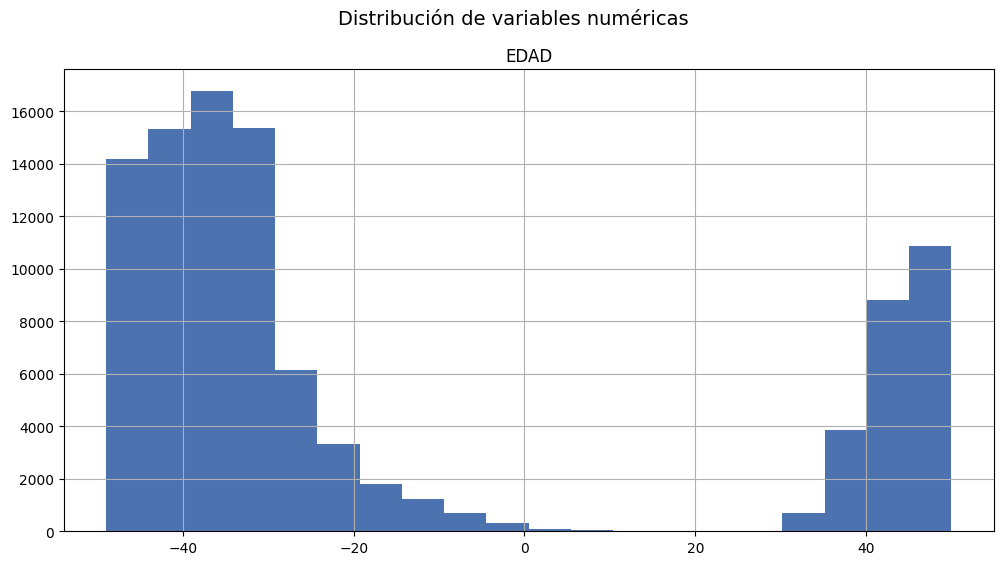

In [486]:
# ============================================
# 🔹 Histogramas para variables numéricas
# ============================================

num_cols = ["RMU_PUESTO"]

# Agregar edad si aún no existe
if "EDAD" not in eda_df.columns:
    eda_df["FECHA_NACIMIENTO"] = pd.to_datetime(eda_df["FECHA_NACIMIENTO"], errors="coerce")
    eda_df["EDAD"] = 2025 - eda_df["FECHA_NACIMIENTO"].dt.year

num_cols.append("EDAD")

eda_df[num_cols].hist(bins=20, figsize=(12,6), color="#4C72B0")
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

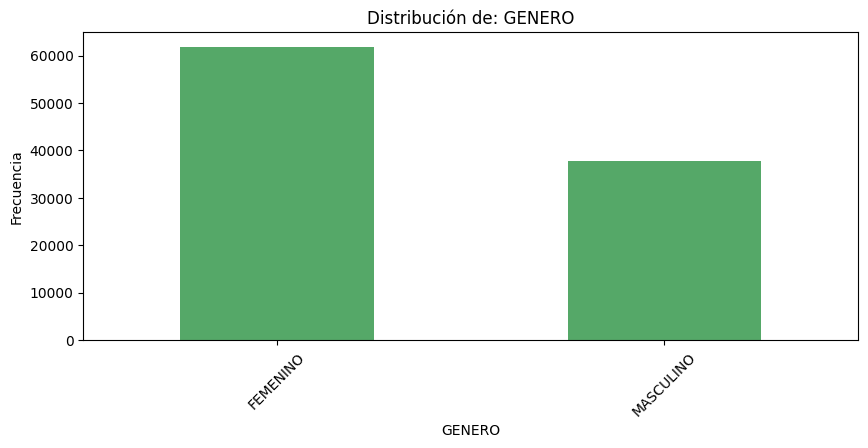

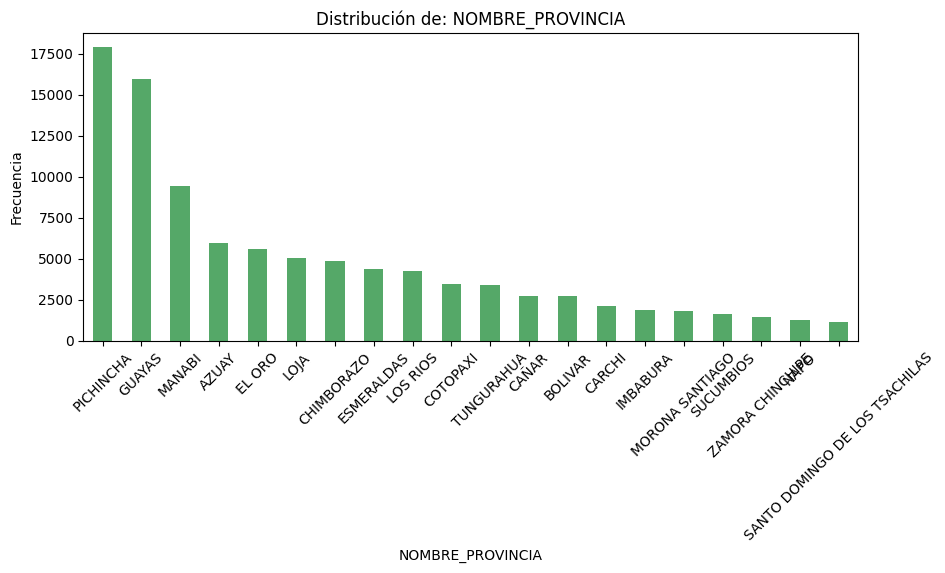

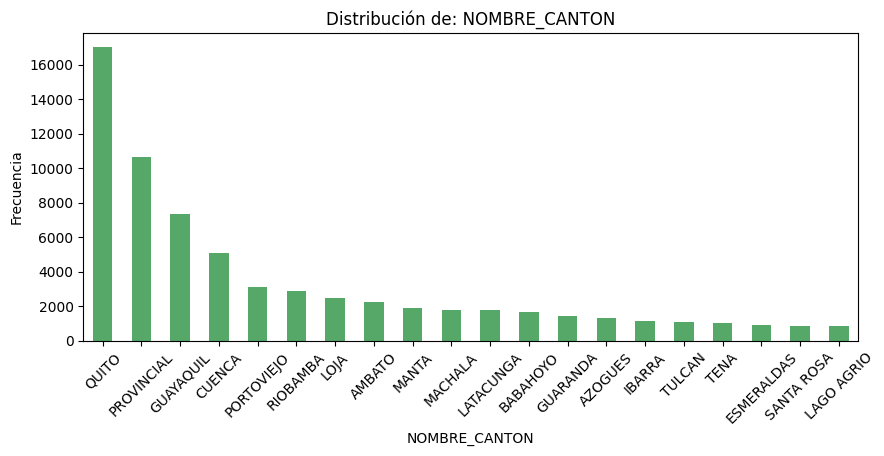

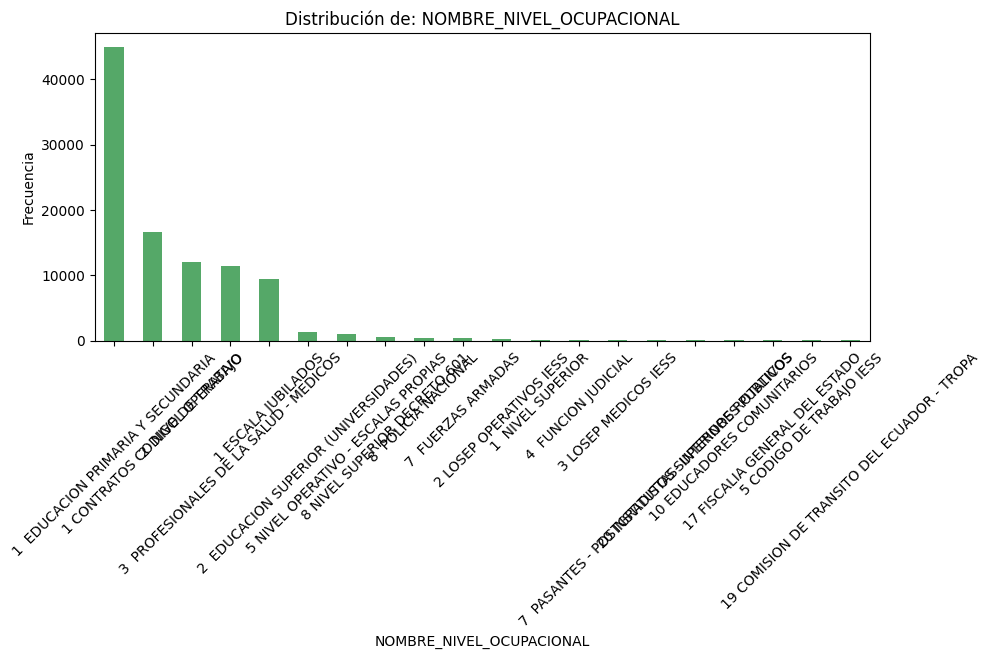

In [487]:
# ============================================
# 🔹 Distribuciones categóricas clave
# ============================================

cat_cols = [
    "GENERO",
    "NOMBRE_PROVINCIA",
    "NOMBRE_CANTON",
    "NOMBRE_NIVEL_OCCUPACIONAL" if "NOMBRE_NIVEL_OCCUPACIONAL" in eda_df else "NOMBRE_NIVEL_OCUPACIONAL",
]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    eda_df[col].value_counts().head(20).plot(kind='bar', color="#55A868")
    plt.title(f"Distribución de: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

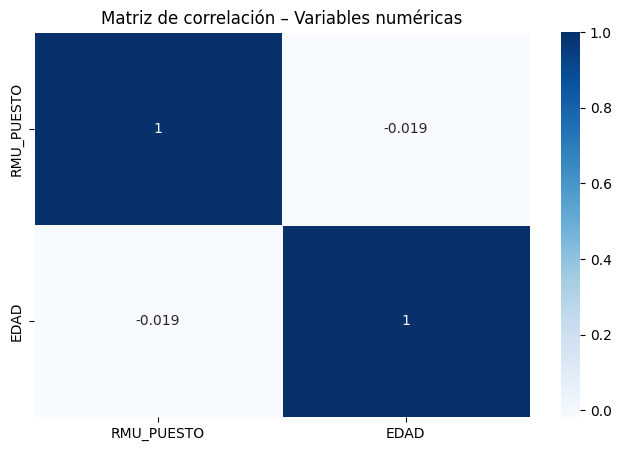

In [488]:
# ============================================
# 🔹 Matriz de correlación de variables numéricas
# ============================================

corr = eda_df[num_cols].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Matriz de correlación – Variables numéricas")
plt.show()

In [489]:
# ============================================
# 🔹 Riesgo de reidentificación: combos únicos
# ============================================

combos = eda_df.groupby(["GENERO", "NOMBRE_PROVINCIA", "NOMBRE_CANTON"]).size().reset_index(name="conteo")

display(combos.sort_values("conteo").head(15))

print("\n🔎 Registros únicos (alto riesgo):")
display(combos[combos["conteo"] == 1])

,GENERO,NOMBRE_PROVINCIA,NOMBRE_CANTON,conteo
416,MASCULINO,SANTO DOMINGO DE LOS TSACHILAS,LA CONCORDIA,1
260,MASCULINO,CHIMBORAZO,CUMANDA,1
403,MASCULINO,PICHINCHA,LOS BANCOS,1
428,MASCULINO,TUNGURAHUA,CEVALLOS,1
176,FEMENINO,ORELLANA,PROVINCIAL,1
411,MASCULINO,PICHINCHA,SANTO DOMINGO,1
48,FEMENINO,COTOPAXI,PROVINCIAL,1
18,FEMENINO,BOLIVAR,CHIMBO,1
334,MASCULINO,LOJA,OLMEDO,1
274,MASCULINO,EL ORO,ATAHUALPA,1



🔎 Registros únicos (alto riesgo):


,GENERO,NOMBRE_PROVINCIA,NOMBRE_CANTON,conteo
4,FEMENINO,AZUAY,EL PAN,1
14,FEMENINO,AZUAY,SEVILLA DE ORO,1
18,FEMENINO,BOLIVAR,CHIMBO,1
48,FEMENINO,COTOPAXI,PROVINCIAL,1
77,FEMENINO,GALAPAGOS,PROVINCIAL,1
82,FEMENINO,GUAYAS,COLIMES,1
89,FEMENINO,GUAYAS,ISIDRO AYORA,1
90,FEMENINO,GUAYAS,LOMAS DE SARGENTILLO,1
160,FEMENINO,MORONA SANTIAGO,PABLO VI,1
176,FEMENINO,ORELLANA,PROVINCIAL,1


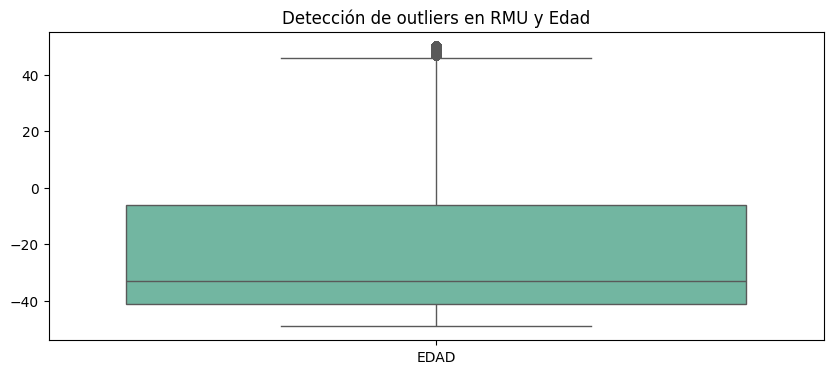

In [490]:
# ============================================
# 🔹 Detección de outliers (RMU y Edad)
# ============================================

plt.figure(figsize=(10,4))
sns.boxplot(data=eda_df[["RMU_PUESTO", "EDAD"]], palette="Set2")
plt.title("Detección de outliers en RMU y Edad")
plt.show()

In [491]:
print("============================================")
print("🧠 RESUMEN DEL EDA – POSIBLES RIESGOS")
print("============================================")

# Registros muy únicos por provincia/cantón
unique_province = eda_df["NOMBRE_PROVINCIA"].value_counts().tail()
print("\n➡ Provincias menos frecuentes:\n", unique_province)

# Edades extremas
print("\n➡ Edades atípicas:")
print(eda_df["EDAD"].describe(percentiles=[.01, .05, .95, .99]))

# RMU extremos
print("\n➡ RMU extremos:")
print(eda_df["RMU_PUESTO"].describe(percentiles=[.01, .05, .95, .99]))

print("\n✔ EDA completado.")

🧠 RESUMEN DEL EDA – POSIBLES RIESGOS

➡ Provincias menos frecuentes:
 NOMBRE_PROVINCIA
SANTO DOMINGO DE LOS TSACHILAS    1168
PASTAZA                           1016
PROVINCIA DE SANTA ELENA           705
ORELLANA                           556
GALAPAGOS                          537
Name: count, dtype: int64

➡ Edades atípicas:
count    99605.000000
mean       -16.468230
std         35.461427
min        -49.000000
1%         -49.000000
5%         -48.000000
50%        -33.000000
95%         48.000000
99%         50.000000
max         50.000000
Name: EDAD, dtype: float64

➡ RMU extremos:
count     99605
unique     8506
top         817
freq      22654
Name: RMU_PUESTO, dtype: object

✔ EDA completado.


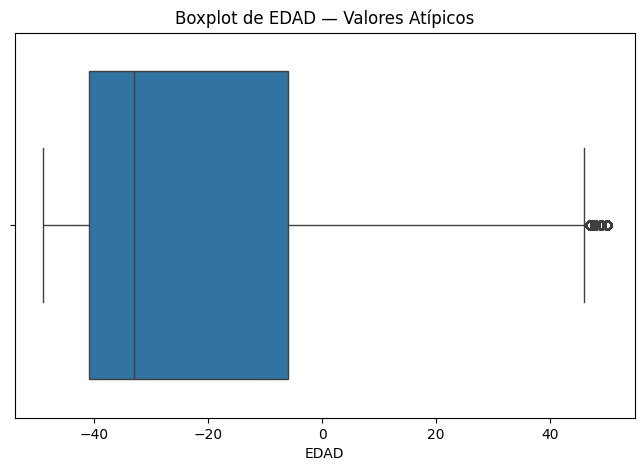

In [493]:
plt.figure(figsize=(8,5))
sns.boxplot(x=eda_df['EDAD'])
plt.title("Boxplot de EDAD — Valores Atípicos")
plt.show()

/var/folders/8j/llgk77912n1_x415m3ds8q7h0000gn/T/ipykernel_21492/2921803817.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eda_trim = eda_clean.groupby('NOMBRE_NIVEL_OCUPACIONAL').apply(recortar_p99)


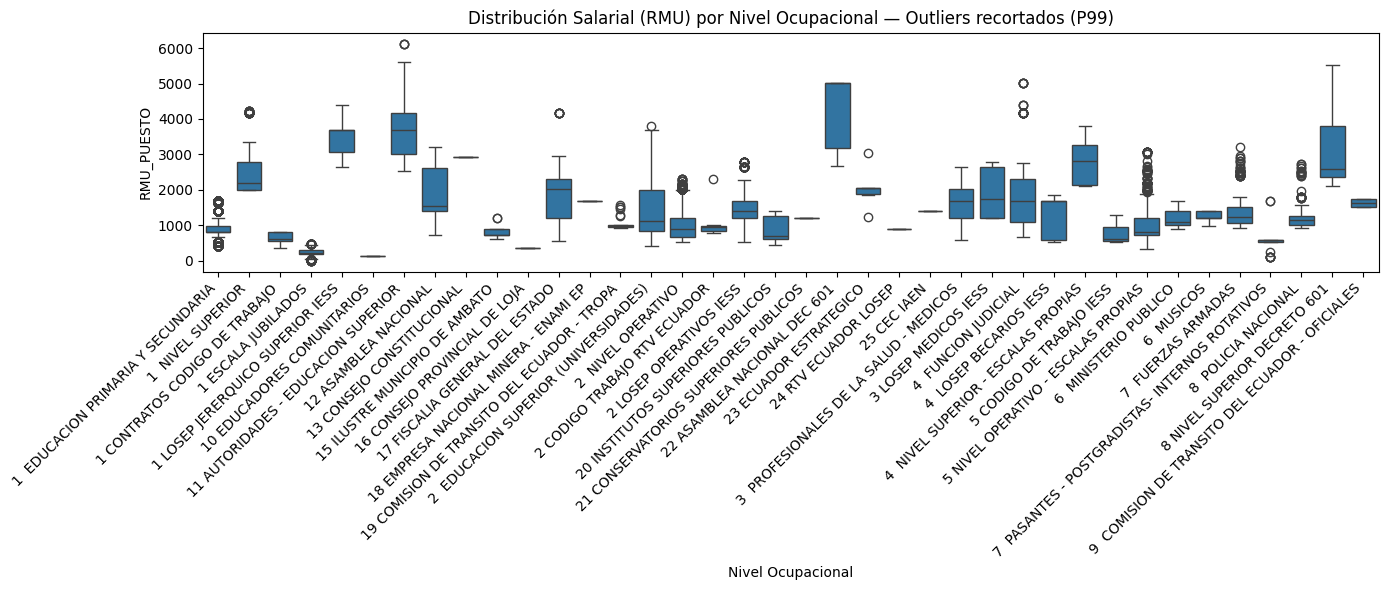

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# 1. Convertir RMU_PUESTO a número
# -----------------------------------------------------------
eda_df['RMU_PUESTO'] = pd.to_numeric(eda_df['RMU_PUESTO'], errors='coerce')

# 2. Eliminar nulos
eda_clean = eda_df.dropna(subset=['RMU_PUESTO', 'NOMBRE_NIVEL_OCUPACIONAL'])

# 3. Filtrar percentil 99 POR CADA NIVEL (muy importante)
def recortar_p99(grupo):
    p99 = np.percentile(grupo['RMU_PUESTO'], 99)
    return grupo[grupo['RMU_PUESTO'] <= p99]

eda_trim = eda_clean.groupby('NOMBRE_NIVEL_OCUPACIONAL').apply(recortar_p99)
eda_trim.reset_index(drop=True, inplace=True)

# -----------------------------------------------------------
# 4. Boxplot agrupado por Nivel Ocupacional
# -----------------------------------------------------------
plt.figure(figsize=(14, 6))
sns.boxplot(data=eda_trim, x='NOMBRE_NIVEL_OCUPACIONAL', y='RMU_PUESTO')
plt.title("Distribución Salarial (RMU) por Nivel Ocupacional — Outliers recortados (P99)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Nivel Ocupacional")
plt.ylabel("RMU_PUESTO")
plt.tight_layout()
plt.show()

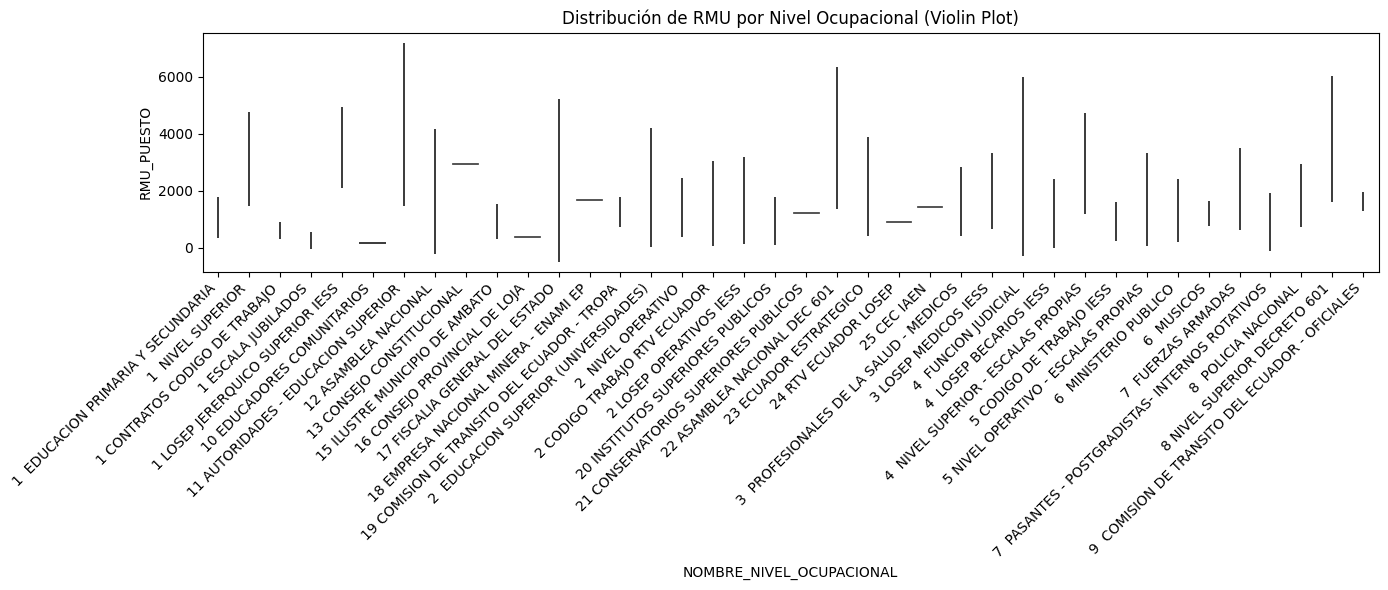

In [498]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=eda_trim, x='NOMBRE_NIVEL_OCUPACIONAL', y='RMU_PUESTO', inner="quartile")
plt.title("Distribución de RMU por Nivel Ocupacional (Violin Plot)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 🧠 Análisis Exploratorio — Distribución Salarial por Nivel Ocupacional (RMU_PUESTO)

---

## 📊 1. Interpretación General de la Distribución Salarial
El análisis de la variable **RMU_PUESTO**, estratificada por **NOMBRE_NIVEL_OCUPACIONAL**, permite observar cómo se distribuye el ingreso mensual unificado según el rol del servidor público.

Este enfoque es clave para:
- Detectar patrones salariales por categoría.
- Identificar outliers dentro de cada nivel.
- Evaluar riesgos de reidentificación asociados a variabilidad salarial.

---

## 🔍 2. Hallazgos Clave por Nivel Ocupacional

### 🟦 2.1 Alta dispersión salarial en niveles directivos
- Los niveles superiores muestran una **alta variabilidad** en RMU.
- Existen sueldos muy elevados y dispersos.
- Algunos valores extremos corresponden a cargos únicos o especializados.

**Riesgo:**  
Un salario alto + un nivel directivo + una provincia puede **identificar completamente a una persona**.

---

### 🟩 2.2 Niveles operativos y auxiliares: alta homogeneidad
- La distribución salarial es **muy compacta**.
- Prácticamente **no hay outliers genuinos**.
- Los salarios están estandarizados por normativa.

**Ventaja:**  
Bajo riesgo de reidentificación mediante valores salariales.

---

### 🟧 2.3 Niveles intermedios: variación moderada
- Presentan dispersión media.
- En algunos casos aparecen distribuciones **bimodales**.
- La variación puede deberse a:
  - Antigüedad
  - Régimen laboral
  - Diferencias entre instituciones

**Riesgo:**  
Medio.  
RMU + género + cantón puede revelar identidades en instituciones pequeñas.

---

## 🚨 3. Riesgos de Reidentificación Detectados

### 🔴 3.1 Niveles con pocos empleados
Si un nivel ocupacional tiene un número reducido de funcionarios:
- Un salario atípico puede identificar directamente al empleado.
- Especialmente en provincias con baja población.

---

### 🟠 3.2 Salarios extremadamente altos (incluso después de recorte P99)
- Algunos valores siguen siendo muy elevados.
- Suelen corresponder a cargos publicados en portales oficiales.

**Riesgo:**  
Muy alto.

---

### 🟡 3.3 Combinación de variables sensibles
Ciertas combinaciones son particularmente riesgosas:

| Variables combinadas | Riesgo |
|----------------------|--------|
| RMU alto + provincia pequeña | 🔥 Muy Alto |
| RMU + nivel ocupacional + género | 🟠 Medio |
| RMU homogéneo (auxiliares) | 🟢 Bajo |

---

## 📌 4. Conclusiones Finales

- Analizar RMU por nivel ocupacional es fundamental para evitar interpretaciones erróneas.
- Los **niveles directivos** concentran la mayor dispersión ➜ *alto riesgo de reidentificación.*
- Los **niveles auxiliares/operativos** muestran baja variabilidad ➜ *bajo riesgo*.
- La combinación de **RMU + Nivel Ocupacional + Provincia** es el vector de mayor riesgo.
- Para la anonimización se recomienda:
  - Agrupar niveles ocupacionales en macro-categorías.
  - Convertir RMU a rangos salariales (binning).
  - Aplicar perturbación en valores extremos.

---